In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv("data.csv")
df.head()

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


In [21]:
column_mapping = {
    "Timestamp": "timestamp",
    "1. What is your year of study?": "year_of_study",
    "2. What is your gender?": "gender",
    "3. How often do you have difficulty falling asleep at night? ": "sleep_difficulty",
    "4. On average, how many hours of sleep do you get on a typical day?": "sleep_hours",
    "5. How often do you wake up during the night and have trouble falling back asleep?": "night_awakening",
    "6. How would you rate the overall quality of your sleep?": "sleep_quality",
    "7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?": "concentration",
    "8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?": "fatigue",
    "9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?": "class_absent",
    "10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?": "assignment_impact",
    "11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?": "screen_time",
    "12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?": "caffeine",
    "13. How often do you engage in physical activity or exercise?": "physical_activity",
    "14. How would you describe your stress levels related to academic workload?": "stress",
    "15. How would you rate your overall academic performance (GPA or grades) in the past semester?": "academic_performance"
}
df = df.rename(columns=column_mapping)
df.head()
df.columns


Index(['timestamp', 'year_of_study', 'gender', 'sleep_difficulty',
       'sleep_hours', 'night_awakening', 'sleep_quality', 'concentration',
       'fatigue', 'class_absent', 'assignment_impact', 'screen_time',
       'caffeine', 'physical_activity', 'stress', 'academic_performance'],
      dtype='object')

In [22]:
for col in df.columns:
    print(f"\n {col}")
    print(df[col].value_counts())


 timestamp
timestamp
12/15/2024 6:06:05     2
12/15/2024 6:02:47     2
10/24/2024 17:04:15    2
10/30/2024 22:24:20    1
10/30/2024 22:23:24    1
                      ..
10/26/2024 13:57:57    1
10/26/2024 13:58:14    1
10/26/2024 13:58:31    1
10/26/2024 13:58:48    1
10/26/2024 10:14:59    1
Name: count, Length: 993, dtype: int64

 year_of_study
year_of_study
Graduate student    481
Third year          419
Second year          74
First year           22
Name: count, dtype: int64

 gender
gender
Male      691
Female    305
Name: count, dtype: int64

 sleep_difficulty
sleep_difficulty
Often (5-6 times a week)        446
Every night                     432
Sometimes (3-4 times a week)     84
Rarely (1-2 times a week)        22
Never                            12
Name: count, dtype: int64

 sleep_hours
sleep_hours
7-8 hours            508
More than 8 hours    390
6-7 hours             60
4-5 hours             27
Less than 4 hours     11
Name: count, dtype: int64

 night_awakening
night

In [23]:
df = df.drop(columns=["timestamp"])

year_map = {
    "First year": 1,
    "Second year": 2,
    "Third year": 3,
    "Graduate student": 4
}
df["year_of_study"] = df["year_of_study"].map(year_map)

gender_map = {
    "Male": 1,
    "Female": 0
}
df["gender"] = df["gender"].map(gender_map)

freq_map = {
    "Never": 0,
    "Rarely (1-2 times a week)": 1,
    "Rarely (1-2 times a month)": 1,
    "Sometimes (1-2 times a week)": 2,
    "Sometimes (3-4 times a week)": 2,
    "Often (3-4 times a week)": 3,
    "Often (5-6 times a week)": 3,
    "Every day": 4,
    "Every night": 4,
    "Always": 4,
    "Often": 3,
    "Sometimes": 2,
    "Rarely": 1,
}
freq_cols = [
    "sleep_difficulty",
    "night_awakening",
    "concentration",
    "fatigue",
    "class_absent",
    "screen_time",
    "caffeine",
    "physical_activity"
]
for col in freq_cols:
    df[col] = df[col].map(freq_map)

sleep_hours_map = {
    "Less than 4 hours": 1,
    "4-5 hours": 2,
    "6-7 hours": 3,
    "7-8 hours": 4,
    "More than 8 hours": 5
}

df["sleep_hours"] = df["sleep_hours"].map(sleep_hours_map)
sleep_quality_map = {
    "Very poor": 1,
    "Poor": 2,
    "Average": 3,
    "Good": 4,
    "Very good": 5
}

df["sleep_quality"] = df["sleep_quality"].map(sleep_quality_map)
assignment_impact_map = {
    "No impact": 1,
    "Minor impact": 2,
    "Moderate impact": 3,
    "Major impact": 4,
    "Severe impact": 5
}

df["assignment_impact"] = df["assignment_impact"].map(assignment_impact_map)
stress_map = {
    "No stress": 1,
    "Low stress": 2,
    "High stress": 3,
    "Extremely high stress": 4
}

df["stress"] = df["stress"].map(stress_map)
performance_map = {
    "Poor": 1,
    "Below Average": 2,
    "Average": 3,
    "Good": 4,
    "Excellent": 5
}

df["academic_performance"] = df["academic_performance"].map(performance_map)
df.isnull().sum()
df.describe()
df.head()


,year_of_study,gender,sleep_difficulty,sleep_hours,night_awakening,sleep_quality,concentration,fatigue,class_absent,assignment_impact,screen_time,caffeine,physical_activity,stress,academic_performance
0,4,1,3,4,3,4,2,3,3,3,3,1,2,3,3
1,3,1,3,4,3,4,3,2,2,4,2,2,2,2,4
2,1,0,2,4,2,4,3,3,2,4,3,3,3,3,2
3,3,1,3,5,2,2,3,3,1,2,2,2,4,4,5
4,4,1,3,4,3,5,4,2,2,3,2,2,3,2,3


In [24]:
target = 'academic_performance'
all_features = [col for col in df.columns if col != target]

#correlation
correlations = df[all_features + [target]].corr()[target].drop(target).abs()
selected_features = correlations[correlations > 0.1].sort_values(ascending=False).index.tolist()

#select features with corelation graeter that 0.1
print(correlations[selected_features].sort_values(ascending=False))

fatigue              0.389880
caffeine             0.383548
night_awakening      0.369190
concentration        0.355358
screen_time          0.350483
assignment_impact    0.334244
class_absent         0.316278
sleep_difficulty     0.296442
physical_activity    0.291247
stress               0.288838
sleep_hours          0.266253
year_of_study        0.239652
gender               0.100408
Name: academic_performance, dtype: float64


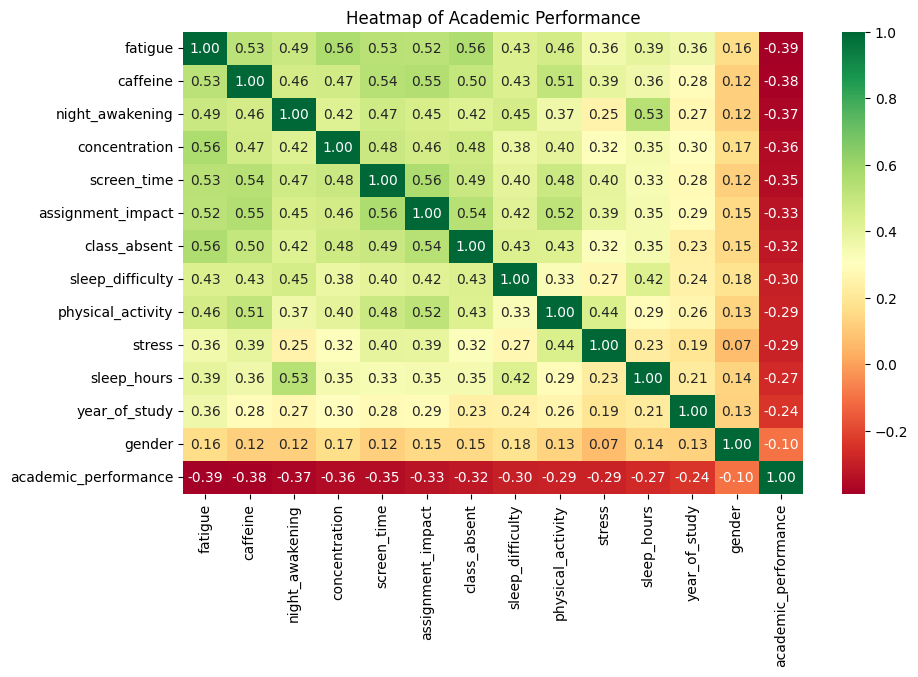

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[selected_features + [target]].corr(),
    annot=True,
    cmap="RdYlGn",
    fmt=".2f"
)
plt.title("Heatmap of Academic Performance")
plt.show()


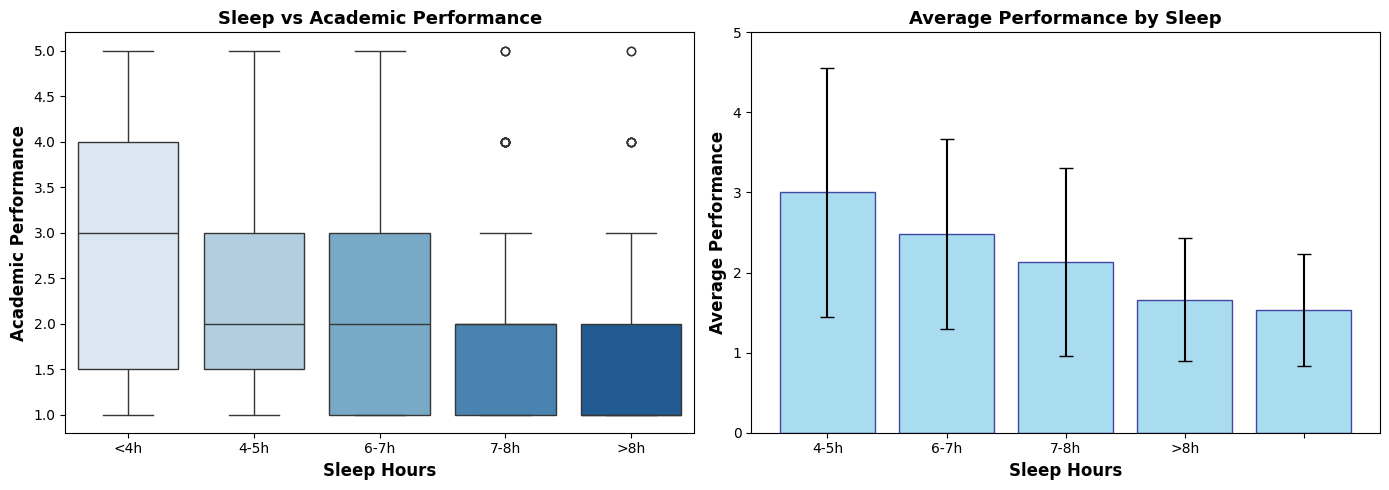

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x="sleep_hours", y="academic_performance", data=df, ax=axes[0], palette="Blues")
axes[0].set_xlabel("Sleep Hours", fontsize=12, fontweight='bold')
axes[0].set_ylabel("Academic Performance", fontsize=12, fontweight='bold')
axes[0].set_title("Sleep vs Academic Performance", fontsize=13, fontweight='bold')
axes[0].set_xticklabels(['<4h', '4-5h', '6-7h', '7-8h', '>8h'])
sleep_summary = df.groupby('sleep_hours')['academic_performance'].agg(['mean', 'std'])

axes[1].bar(sleep_summary.index, sleep_summary['mean'], yerr=sleep_summary['std'],capsize=5, alpha=0.7, color='skyblue', edgecolor='navy')
axes[1].set_xlabel("Sleep Hours", fontsize=12, fontweight='bold')
axes[1].set_ylabel("Average Performance", fontsize=12, fontweight='bold')
axes[1].set_title("Average Performance by Sleep", fontsize=13, fontweight='bold')
axes[1].set_xticklabels(['<4h', '4-5h', '6-7h', '7-8h', '>8h'])
axes[1].set_ylim([0, 5])

plt.tight_layout()
plt.show()

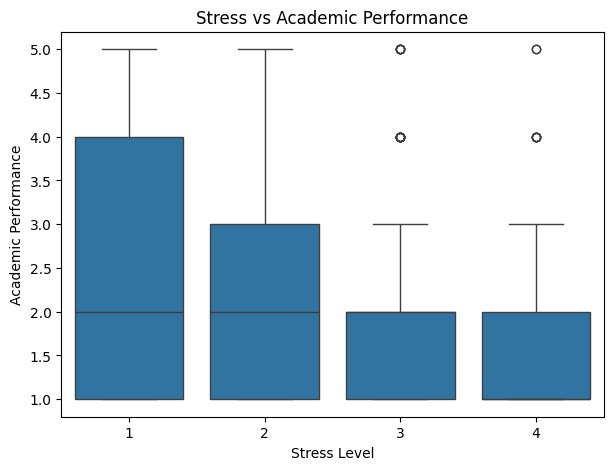

In [27]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="stress", y="academic_performance", data=df)
plt.xlabel("Stress Level")
plt.ylabel("Academic Performance")
plt.title("Stress vs Academic Performance")
plt.show()


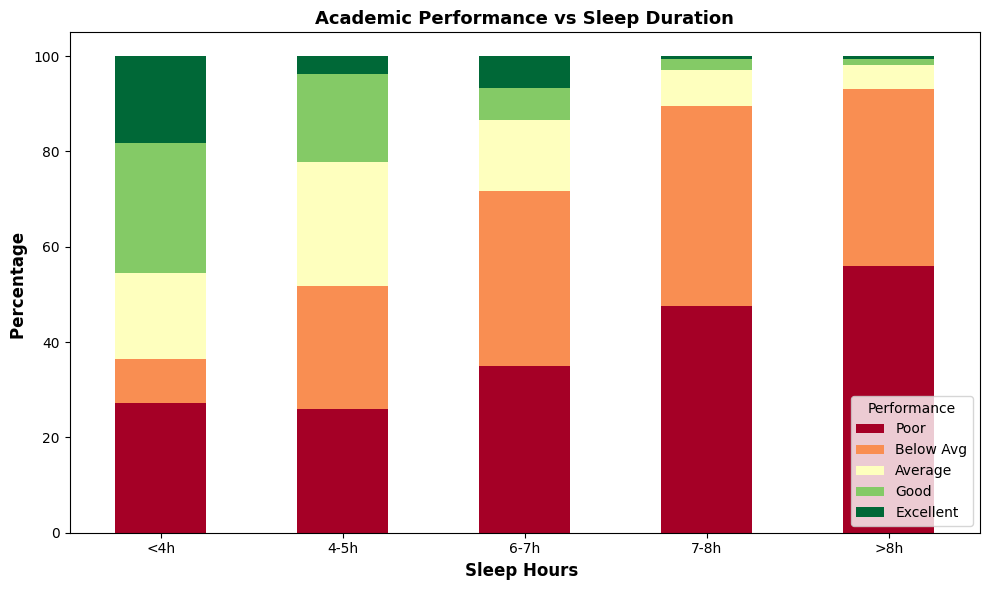

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
cross_tab = pd.crosstab(df['sleep_hours'], df['academic_performance'], normalize='index') * 100
cross_tab.plot(kind='bar', stacked=True, ax=ax, colormap='RdYlGn')
ax.set_xlabel("Sleep Hours ", fontsize=12, fontweight='bold')
ax.set_ylabel("Percentage ", fontsize=12, fontweight='bold')
ax.set_title("Academic Performance vs Sleep Duration", fontsize=13, fontweight='bold')
ax.set_xticklabels(['<4h', '4-5h', '6-7h', '7-8h', '>8h'], rotation=0)
ax.legend(title='Performance', labels=['Poor', 'Below Avg', 'Average', 'Good', 'Excellent'])
plt.tight_layout()
plt.show()

In [29]:
sleep_perf = df.groupby('sleep_hours')['academic_performance'].agg(['mean', 'std', 'count'])
print(sleep_perf)
best_sleep_hours = sleep_perf['mean'].idxmax()

stress_perf = df.groupby('stress')['academic_performance'].agg(['mean', 'std', 'count'])
print(stress_perf)

all_nighters = df[df['sleep_hours'] == 1]
good_sleepers = df[df['sleep_hours'] >= 3]
print(f"   All-nighters (<4 hrs): {len(all_nighters)} students, Avg Performance: {all_nighters['academic_performance'].mean():.2f}")
print(f"   Good sleepers (6+ hrs): {len(good_sleepers)} students, Avg Performance: {good_sleepers['academic_performance'].mean():.2f}")


                 mean       std  count
sleep_hours                           
1            3.000000  1.549193     11
2            2.481481  1.188741     27
3            2.133333  1.171218     60
4            1.663386  0.765940    508
5            1.533333  0.700838    390
            mean       std  count
stress                           
1       2.727273  1.678744     11
2       2.412698  1.239601     63
3       1.747685  0.816730    432
4       1.497959  0.659209    490
   All-nighters (<4 hrs): 11 students, Avg Performance: 3.00
   Good sleepers (6+ hrs): 958 students, Avg Performance: 1.64


In [30]:

X = df[selected_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (alpha=0.1)': Ridge(alpha=0.1),
    'Ridge (alpha=1.0)': Ridge(alpha=1.0),
    'Ridge (alpha=10)': Ridge(alpha=10),
    'Random Forest (depth=5)': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Random Forest (depth=10)': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Random Forest (depth=15)': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
}

results = []

for name, model in models.items():
    #train
    model.fit(X_train_scaled, y_train)

    #predict
    y_pred = model.predict(X_test_scaled)

    #evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    #R²
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                                 scoring='r2')
    cv_r2 = cv_scores.mean()

    results.append({
        'Model': name,
        'R² (Test)': r2,
        'R² (CV)': cv_r2,
        'MAE': mae,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results).sort_values('R² (Test)', ascending=False)
print(results_df.to_string(index=False))

                   Model  R² (Test)  R² (CV)      MAE     RMSE
        Ridge (alpha=10)   0.211284 0.178291 0.583223 0.727535
       Ridge (alpha=1.0)   0.210435 0.177057 0.583217 0.727926
       Ridge (alpha=0.1)   0.210347 0.176927 0.583217 0.727967
       Linear Regression   0.210338 0.176913 0.583217 0.727971
 Random Forest (depth=5)   0.186632 0.134224 0.596897 0.738817
Random Forest (depth=10)   0.166279 0.096842 0.584484 0.748004
Random Forest (depth=15)   0.118806 0.084874 0.598863 0.769005


In [31]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)

print(f"Best Model: {best_model_name}")
print(f"R²: {results_df.iloc[0]['R² (Test)']:.4f}")
print(f"MAE: {results_df.iloc[0]['MAE']:.4f}")


Best Model: Ridge (alpha=10)
R²: 0.2113
MAE: 0.5832


In [32]:
within_05 = np.mean(np.abs(y_test - y_pred_best) <= 0.5)
within_1 = np.mean(np.abs(y_test - y_pred_best) <= 1)
within_15 = np.mean(np.abs(y_test - y_pred_best) <= 1.5)

print(f"   Within ±0.5 grades: {within_05 * 100:.2f}%")
print(f"   Within ±1.0 grade:  {within_1 * 100:.2f}%")
print(f"   Within ±1.5 grades: {within_15 * 100:.2f}%")


   Within ±0.5 grades: 49.50%
   Within ±1.0 grade:  90.00%
   Within ±1.5 grades: 96.00%


In [33]:
if 'Random Forest' in best_model_name:
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

all_nighter_perf = df[df['sleep_hours'] == 1]['academic_performance'].mean()
optimal_sleep_perf = df[df['sleep_hours'] == 4]['academic_performance'].mean()
good_sleep_perf = df[df['sleep_hours'] >= 3]['academic_performance'].mean()
sleep_quality_corr = df[['sleep_quality', 'academic_performance']].corr().iloc[0, 1]
stress_corr = df[['stress', 'academic_performance']].corr().iloc[0, 1]

print(f"""
1. SLEEP IMPACT:
   • All-nighters (<4h):       {all_nighter_perf:.2f}/5.0 avg performance
   • Good sleep (6+ hours):    {good_sleep_perf:.2f}/5.0 avg performance
   • Performance gap:          {(good_sleep_perf - all_nighter_perf):.2f} points

2. CORRELATIONS WITH PERFORMANCE:
   • Sleep Quality:            {sleep_quality_corr:.3f}
   • Stress Level:             {stress_corr:.3f}

3. MODEL PERFORMANCE:
   • Best R² Score:            {results_df.iloc[0]['R² (Test)']:.4f}
   • Prediction Accuracy:      {within_1*100:.1f}% within ±1 grade

VERDICT: {'MYTH!' if good_sleep_perf > all_nighter_perf else 'MIRACLE'}

""")



1. SLEEP IMPACT:
   • All-nighters (<4h):       3.00/5.0 avg performance
   • Good sleep (6+ hours):    1.64/5.0 avg performance
   • Performance gap:          -1.36 points
   
2. CORRELATIONS WITH PERFORMANCE:
   • Sleep Quality:            -0.018
   • Stress Level:             -0.289
   
3. MODEL PERFORMANCE:
   • Best R² Score:            0.2113
   • Prediction Accuracy:      90.0% within ±1 grade

VERDICT: MIRACLE


